In [10]:
#Classify data from DB here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# df = pd.read_csv('data.csv', header = None)
# df.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]
# df = df.drop("class", axis = 1)
# df.to_csv("noclass.csv", index = False, header=False)

df = pd.read_csv('noclass.csv')

labels = []
for i in df.index:
    lightState = int(df.iloc[i,5])
    airconState = int(df.iloc[i,6])
    if airconState == 0 and lightState == 0:
        label = "nanl"
    elif airconState == 0 and lightState == 1:
        label = "nagl"
    elif airconState == 1 and lightState == 0: 
        label = "ganl"
    elif airconState == 1 and lightState == 1:
        label = "gagl"
    labels.append(label)

df.insert(9,"class", labels, True)

df.to_csv("post.csv", index = False)


In [11]:

df = pd.read_csv('post.csv', header= None)
#day of week, time, temperature, humidity, light on/off, aircon on/off, aircon temp, room, class
df.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]

# tentatively reduced to 5 features for POC
y = df['class']
X = df.drop('class', axis =1)
# X = X.drop('hour', axis = 1)
X = X.drop('minute', axis = 1)
X = X.drop('light_state', axis = 1)
X = X.drop('aircon_state', axis = 1)
X = X.drop('aircon_temp', axis = 1)
X = X.drop('room', axis = 1)
X = X.drop('humidity', axis = 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0    0    1    0]
 [   0   58 1065 1086   58]
 [   0  236 9750  138  464]
 [   0  183  197 9348   81]
 [   0   68 1804 1054  214]]


C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       class       0.00      0.00      0.00         1
        gagl       0.11      0.03      0.04      2267
        ganl       0.76      0.92      0.83     10588
        nagl       0.80      0.95      0.87      9809
        nanl       0.26      0.07      0.11      3140

    accuracy                           0.75     25805
   macro avg       0.39      0.39      0.37     25805
weighted avg       0.66      0.75      0.69     25805



C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn import tree
from sklearn.metrics import accuracy_score

testNeighbors = [1,3,5,7,9,11,13,15,17,19,21,31,41,51,61,71,81,91,101,201,265]
error = []
trainAcc = []
testAcc = []

# Calculating error for K values between 1 and 265
for i in testNeighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    Y_predTrain = knn.predict(X_train)
    Y_predTest = knn.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

Text(0, 0.5, 'Accuracy')

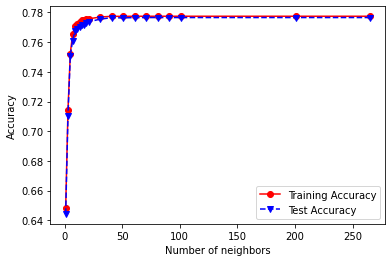

In [14]:
plt.plot(testNeighbors, trainAcc, 'ro-', testNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [15]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

import pickle
knnPickle = open('knnPrediction', 'wb') 

# source, destination 
pickle.dump(knn, knnPickle)  
knnPickle.close()
# load the model from disk
loaded_model = pickle.load(open('knnPrediction', 'rb'))
result = loaded_model.predict(X_test)
print(result)

[[    0     0     0     1     0]
 [    0     6  1102  1112    47]
 [    0    41 10029   129   389]
 [    0    14   198  9567    30]
 [    0    12  1854  1079   195]]


C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

       class       0.00      0.00      0.00         1
        gagl       0.08      0.00      0.01      2267
        ganl       0.76      0.95      0.84     10588
        nagl       0.80      0.98      0.88      9809
        nanl       0.30      0.06      0.10      3140

    accuracy                           0.77     25805
   macro avg       0.39      0.40      0.37     25805
weighted avg       0.66      0.77      0.69     25805

['nagl' 'ganl' 'ganl' ... 'nagl' 'ganl' 'ganl']


# Do a check for accuracy "if" statement before saving model